In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType
from pyspark.sql.functions import col

import time

In [18]:
# Replace with your cluster's master URL
master_url = "spark://spark-master:7077"  # Or use the actual hostname or IP

spark = SparkSession.builder \
    .appName("MyLocalSparkJob") \
    .getOrCreate()

In [19]:
import random

def create_dataframe(num_rows, num_cols):

    #generate column names
    column_names = [f"col{i}" for i in range(num_cols)]

    #generate data
    data = [[random.random() for _ in range(num_cols)] for _ in range(num_rows)]

    #define schema
    schema = StructType([StructField(name, StringType(),True) for name in column_names])

    return spark.createDataFrame(data, schema)

In [20]:
def cast_to_float_withColumns(df):
    #use for loop 
    for col in df.columns:
        df = df.withColumn(col, df[col].cast(FloatType()))

    return df

In [21]:
def cast_to_float_select(df):
    casted_columns = [col(column_name).cast(FloatType()).alias(column_name) for column_name in df.columns]

    df_casted = df.select(*casted_columns)

    return df_casted

In [6]:
df = create_dataframe(320,50)

In [7]:
start_time = time.time()
with_col = cast_to_float_withColumns(df)
end_time = time.time()

In [8]:
end_time - start_time

1.2751898765563965

In [9]:
start_time = time.time()
with_select = cast_to_float_select(df)
end_time = time.time()

In [10]:
end_time - start_time

0.38121604919433594

In [11]:
import time

def compare_withColumn_and_select_performance(num_rows=50, col_num_list = [1, 5, 10, 50, 100]):
    """
    Compares the performance of `withColumn` and `select` methods on dataframes with varying column numbers.
    
    Parameters:
    - create_dataframe: Function to create a dataframe with the specified number of rows and columns.
    - cast_to_float_withColumns: Function that casts columns to float using `withColumn`.
    - cast_to_float_select: Function that casts columns to float using `select`.
    - max_columns: The maximum number of columns to test (default is 100).
    - num_rows: The number of rows in the dataframe (default is 50).

    Returns:
    - with_col_times_list: A list of times for `withColumn`.
    - select_times_list: A list of times for `select`.
    """
    with_col_times_list = []
    select_times_list = []
    
    for col_num in col_num_list:
        # Generate the dataframe once
        df = create_dataframe(num_rows, col_num)

        # Measure performance for withColumn
        start_time = time.time()
        _ = cast_to_float_withColumns(df).count()
        with_col_times_list.append(time.time() - start_time)

        # Measure performance for select
        start_time = time.time()
        _ = cast_to_float_select(df).count()
        select_times_list.append(time.time() - start_time)

    return with_col_times_list, select_times_list

# Example usage:



In [12]:
import matplotlib.pyplot as plt

def plot_two_data_lists(data_list1, data_list2, x_labels=None, title="Data Plot", xlabel="X-axis", ylabel="Y-axis", label1="Data 1", label2="Data 2"):
    """
    Plots two data lists on the same axis with custom x-axis labels.

    Parameters:
    - data_list1: The first list of numerical values to plot.
    - data_list2: The second list of numerical values to plot.
    - x_labels: A list of labels for the x-axis. If None, the x-axis will be labeled with indices.
    - title: The title of the plot (default is "Data Plot").
    - xlabel: The label for the x-axis (default is "X-axis").
    - ylabel: The label for the y-axis (default is "Y-axis").
    - label1: The label for the first data list (default is "Data 1").
    - label2: The label for the second data list (default is "Data 2").
    """
    plt.figure(figsize=(10, 5))
    
    # Plot the first data list
    plt.plot(data_list1, marker='o', label=label1)
    
    # Plot the second data list
    plt.plot(data_list2, marker='s', label=label2)
    
    if x_labels:
        plt.xticks(ticks=range(len(x_labels)), labels=x_labels)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()  # Add a legend to differentiate between the two data sets
    plt.show()


In [15]:
%%time
col_num_list = [1, 5, 10, 50, 100, 250, 500, 750, 100]
with_col_times, select_times = compare_withColumn_and_select_performance(
    num_rows=500,
    col_num_list = col_num_list
)

24/09/14 14:24:15 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


CPU times: user 4.61 s, sys: 2.73 s, total: 7.34 s
Wall time: 24min 59s


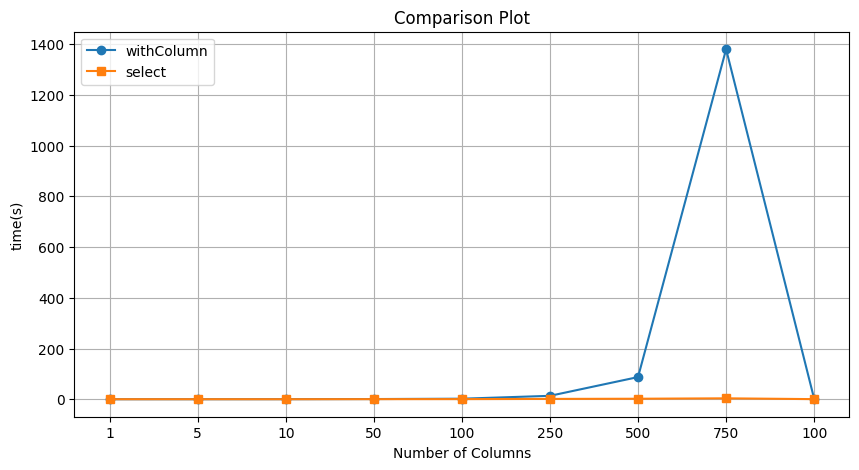

In [16]:
plot_two_data_lists(
    with_col_times, 
    select_times, 
    title="Comparison Plot", 
    xlabel="Number of Columns", 
    x_labels=col_num_list,
    ylabel="time(s)", 
    label1="withColumn", 
    label2="select")

In [11]:
if with_col.schema == with_select.schema:
    print("Schemas are identical")
else:
    print("Schemas differ")

Schemas are identical


In [4]:
df1 = create_dataframe(5,10)
df2 = create_dataframe(5,10)

In [33]:
df_list = [df1, df1, df2]

In [34]:
len(df_list)

3

In [35]:
from functools import reduce

In [36]:
df_new = reduce(lambda df1, df2: df1.intersect(df2), df_list)

In [37]:
df_new.count()

0

In [11]:
df1.count()

5

In [12]:
df2.count()

5